In [1]:
import esma

In [2]:
#Step 1 - Initialize model
model = esma.project(project_id="C") #Initialize model
model.set_cores(8) #Define number of processing cores
model.get_structure(format='poscar',name='C.poscar',path='./Structures') #Load structure
model.ecutwfc(120) #Wavefunction cut-off
model.k_points(8) #k mesh 
model.degauss(0.01) #degauss value
model.conv_thr("1e-8") #electron convergence threshold

In [3]:
#Step 2 - Crystal optimization
model.calculate('vc-relax')

vc-relax for results is started
vc-relax for results is finished


In [4]:
#Step 3 - Atomic optimization
model.get_structure('vc-relax') #Get vc-relaxed strucutre
model.make_layer(layer_type='mono') #mono layer 
model.k_points([8,8,1])
model.calculate('relax')

relax for results is started
relax for results is finished


In [5]:
#Step 4 - Scf calculation
model.get_structure('relax') #Get relaxed strucutre
model.calculate('scf')

scf for results is started
scf for results is finished


In [6]:
#Step 5 - Bands calculation
path = ['GAMMA','M','K','GAMMA'] #choose corners
model.band_points(path,number=40) #define path
model.calculate('bands')

bands for results is started
bands for results is finished
bands-pp for results is started
bands-pp for results is finished


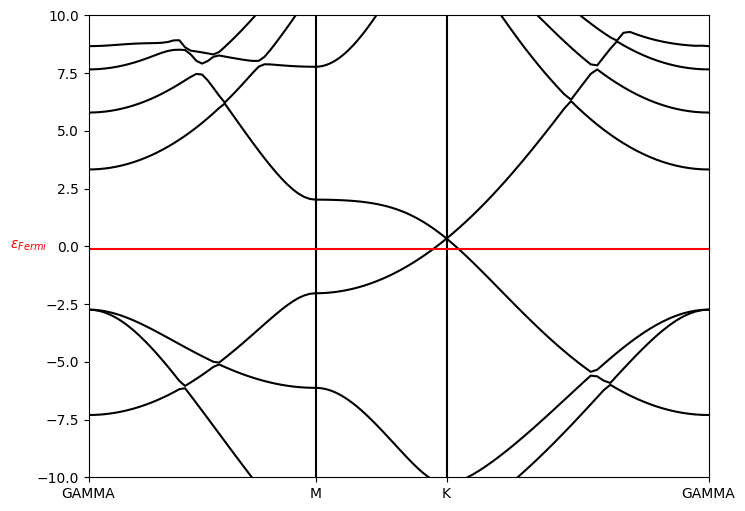

In [7]:
#Step 6 - Plotting
model.plot('electron',ylim=[-10,10]) #plot electron bands